<ipython-input-6-6b90a859c40c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_fields.values, y=top_fields.index, palette='viridis')
<ipython-input-6-6b90a859c40c>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(x=application_types.values, y=application_types.index, palette='coolwarm')


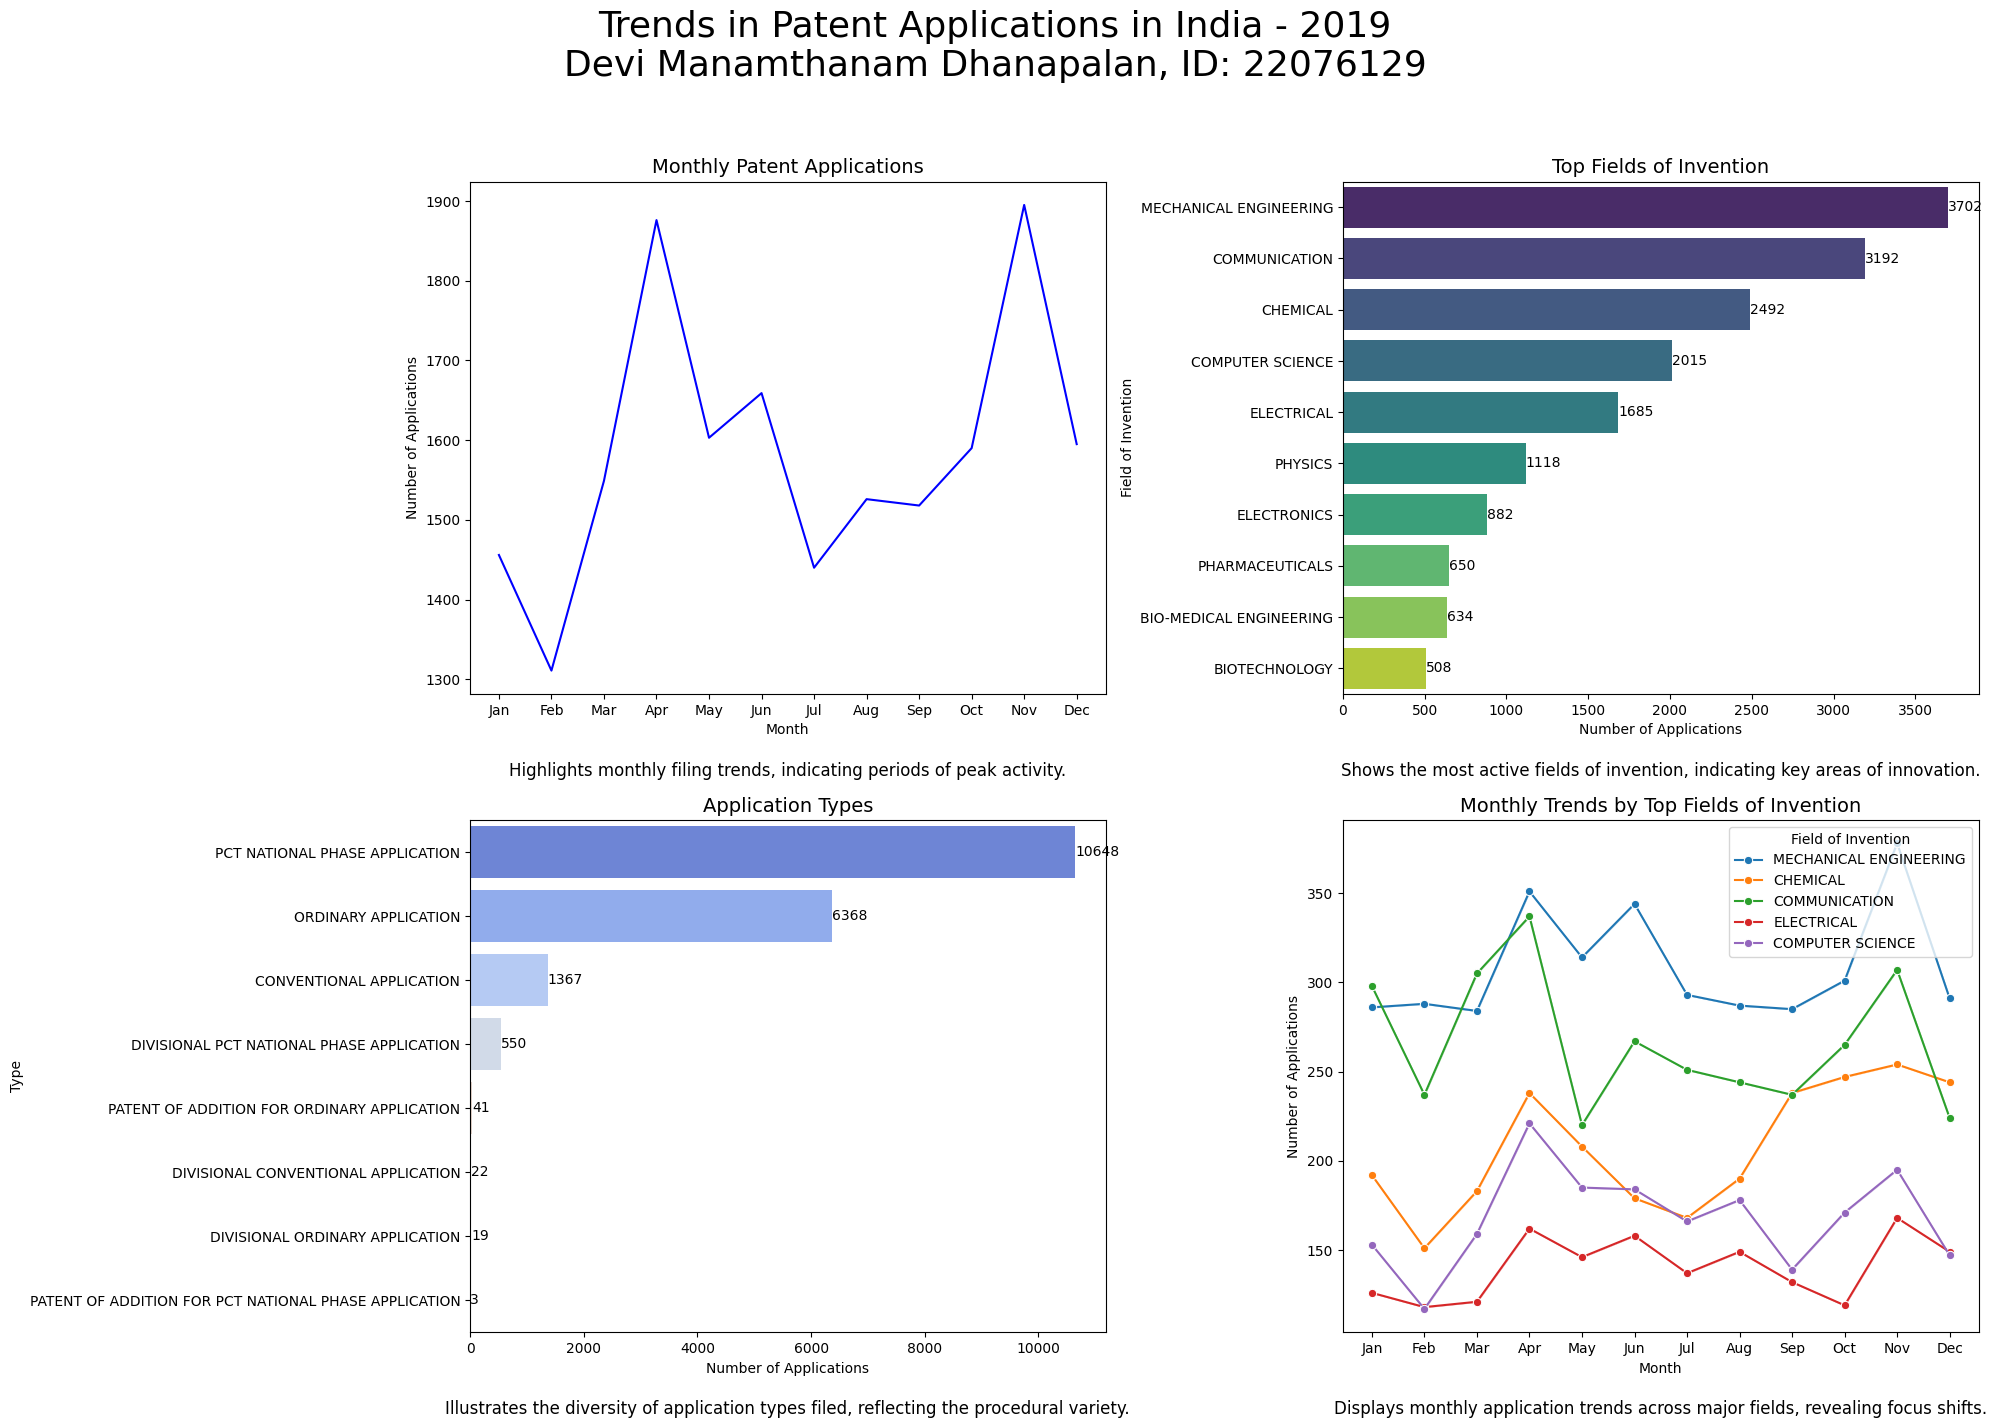

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from an Excel file
df = pd.read_excel('indian_patent_dataset.xlsx')

# Convert dates to datetime objects and handle missing values
df['Application Date'] = pd.to_datetime(df['Application Date'], errors='coerce')

# Since we're focusing on 2019, filter the data for this year
df = df[df['Application Date'].dt.year == 2019]

# Handle missing values by dropping rows where the Application Date is missing
df.dropna(subset=['Application Date'], inplace=True)

# If fields such as 'Field Of Invention' have missing values, consider filling them
df['Field Of Invention'].fillna('Unknown', inplace=True)

# Create a month column for trend analysis within the year 2019
df['month'] = df['Application Date'].dt.month

# Visualization setup
plt.figure(figsize=(20, 15))
plt.suptitle('Trends in Patent Applications in India - 2019\nDevi Manamthanam Dhanapalan, ID: 22076129', fontsize=26)

# Plot 1: Monthly trends in patent applications
plt.subplot(2, 2, 1)
monthly_trends = df['month'].value_counts().sort_index()
monthly_trends.plot(kind='line', color='blue')
plt.title('Monthly Patent Applications', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.text(0.5, -0.15, 'Highlights monthly filing trends, indicating periods of peak activity.', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

# Plot 2: Top fields of invention
plt.subplot(2, 2, 2)
top_fields = df['Field Of Invention'].value_counts().head(10)
barplot = sns.barplot(x=top_fields.values, y=top_fields.index, palette='viridis')
plt.title('Top Fields of Invention', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('Field of Invention')
for index, value in enumerate(top_fields.values):
    barplot.text(value, index, str(value), color='black', va='center')
plt.text(0.5, -0.15, 'Shows the most active fields of invention, indicating key areas of innovation.', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

# Plot 3: Number of applications by application type
plt.subplot(2, 2, 3)
application_types = df['Application Type'].value_counts().head(10)
barplot2 = sns.barplot(x=application_types.values, y=application_types.index, palette='coolwarm')
plt.title('Application Types', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('Type')
for index, value in enumerate(application_types.values):
    barplot2.text(value, index, str(value), color='black', va='center')
plt.text(0.5, -0.15, 'Illustrates the diversity of application types filed, reflecting the procedural variety.', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

# Plot 4: Monthly trends by top fields of invention
plt.subplot(2, 2, 4)
top_fields_list = top_fields.index[:5]  # Top 5 fields of invention
monthly_field_data = df[df['Field Of Invention'].isin(top_fields_list)]
sns.lineplot(x='month', y='Application Number', hue='Field Of Invention', estimator=len, data=monthly_field_data, marker='o')
plt.title('Monthly Trends by Top Fields of Invention', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Field of Invention')
plt.text(0.5, -0.15, 'Displays monthly application trends across major fields, revealing focus shifts.', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

# Save the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
